In [86]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, roc_curve
import matplotlib.pyplot as plt
import seaborn as sns
from tensorflow.keras.optimizers import Adam
# Load the dataset and explore the features.
diabetes =pd.read_csv('/kaggle/input/pima-indians-diabetes-database/diabetes.csv')
diabetes.head()


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [87]:
# Handle missing values (e.g., by replacing zeros or using imputation techniques).
diabetes.fillna(diabetes.mean(), inplace=True)


In [88]:
# for column in diabetes:
#   diabetes[column] = LabelEncoder().fit_transform(diabetes[column])

In [89]:
# Normalize the features to ensure proper scaling for neural networks.
scaler = StandardScaler()
inputs = diabetes.drop(columns=['Outcome'])  
outputs = diabetes['Outcome']
features_scaled = scaler.fit_transform(features)



In [90]:
# Split the dataset into training and testing sets.
X_train, X_test, y_train, y_test = train_test_split(features_scaled, outputs, test_size=0.3, random_state=50)

In [91]:
#Build a feed-forward neural network with at least one hidden layer.
# Build a feed-forward neural network with at least one hidden layer.
# Use activation functions like ReLU for hidden layers and a sigmoid activation for the output layer (binary classification).
# Use binary cross-entropy as the loss function since this is a binary classification problem.

neural_model = Sequential([
    Dense(64, activation='relu', input_shape=(X_train.shape[1],)),
    Dense(32, activation='relu'),
    Dense(1, activation='sigmoid') 
])
neural_model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

/opt/conda/lib/python3.10/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [93]:
# Train the neural network model using the training dataset.
# Use an optimizer like Adam and monitor performance on the validation set.
model_train = neural_model.fit(X_train, y_train, epochs=40, batch_size=30, validation_split=0.3)


Epoch 1/40
13/13 ━━━━━━━━━━━━━━━━━━━━ 2s 20ms/step - accuracy: 0.4033 - loss: 0.7260 - val_accuracy: 0.5556 - val_loss: 0.6970
Epoch 2/40
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.5800 - loss: 0.6961 - val_accuracy: 0.6358 - val_loss: 0.6734
Epoch 3/40
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.6519 - loss: 0.6679 - val_accuracy: 0.7160 - val_loss: 0.6510
Epoch 4/40
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.7387 - loss: 0.6541 - val_accuracy: 0.7901 - val_loss: 0.6300
Epoch 5/40
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.8096 - loss: 0.6179 - val_accuracy: 0.8086 - val_loss: 0.6101
Epoch 6/40
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.8291 - loss: 0.5979 - val_accuracy: 0.8580 - val_loss: 0.5914
Epoch 7/40
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.8559 - loss: 0.5823 - val_accuracy: 0.8765 - val_loss: 0.5730
Epoch 8/40
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.8965 - loss: 0.5597 - val_accuracy: 0.9136 - val_loss

8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step
Accuracy: 0.99
Precision: 1.00
Recall: 0.98
F1 Score: 0.99


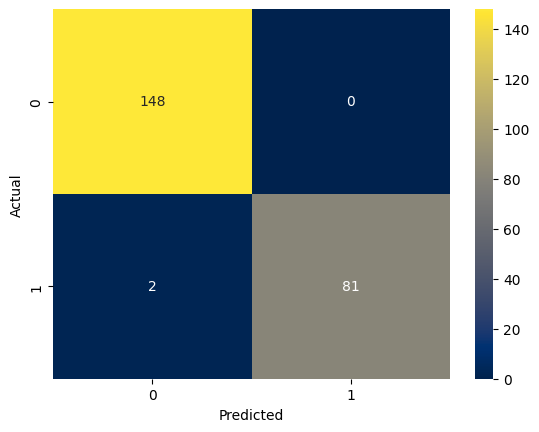

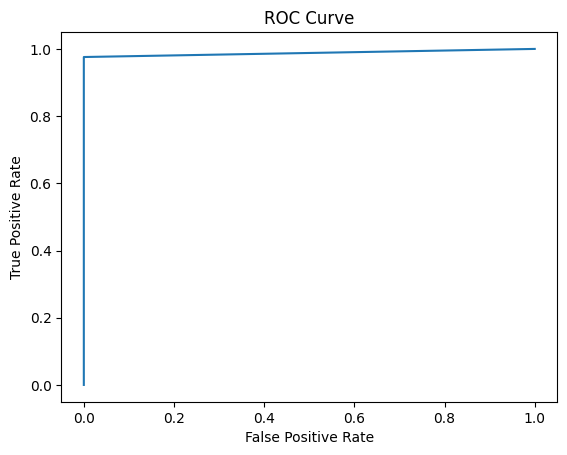

In [94]:
# Evaluate the model on the testing set using accuracy, precision, recall, and F1-score.
# Visualize the model's performance using confusion matrix and ROC curve.

y_pred = (neural_model.predict(X_test) > 0.5).astype("int32")


accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print(f'Accuracy: {accuracy:.2f}')
print(f'Precision: {precision:.2f}')
print(f'Recall: {recall:.2f}')
print(f'F1 Score: {f1:.2f}')

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='cividis')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

# roc Curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred)
plt.plot(fpr, tpr)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.show()

In [96]:
#Experiment with different network architectures, including the number of hidden layers, number of neurons, learning rate, and batch size to improve performance.

def create_model(num_layers=1, neurons=32, learning_rate=0.001):
    neural_model = Sequential()
    # Input layer with the first hidden layer
    model.add(Dense(neurons, input_dim=X_train.shape[1], activation='relu'))
    
    # Additional hidden layers
    for _ in range(num_layers - 1):
        neural_model.add(Dense(neurons, activation='relu'))
    
    # Output layer
    neural_model.add(Dense(1, activation='sigmoid'))
    
    # Compile the model
    optimizer = Adam(learning_rate=learning_rate)
    neural_model.compile(optimizer=optimizer, loss='binary_crossentropy', metrics=['accuracy'])
    return neural_model

# Parameters to experiment with
architectures = [
    {'num_layers': 1, 'neurons': 16, 'learning_rate': 0.001, 'batch_size': 32},
    {'num_layers': 2, 'neurons': 32, 'learning_rate': 0.0004, 'batch_size': 32},
    {'num_layers': 2, 'neurons': 64, 'learning_rate': 0.0008, 'batch_size': 64},
    {'num_layers': 3, 'neurons': 90, 'learning_rate': 0.000001, 'batch_size': 32}
]

# Loop through each architecture and evaluate
results = []
for config in architectures:
    print(f"Training model with config: {config}")
    neural_model = create_model(
        num_layers=config['num_layers'],
        neurons=config['neurons'],
        learning_rate=config['learning_rate']
    )

Training model with config: {'num_layers': 1, 'neurons': 16, 'learning_rate': 0.001, 'batch_size': 32}
Training model with config: {'num_layers': 2, 'neurons': 32, 'learning_rate': 0.0004, 'batch_size': 32}
Training model with config: {'num_layers': 2, 'neurons': 64, 'learning_rate': 0.0008, 'batch_size': 64}
Training model with config: {'num_layers': 3, 'neurons': 90, 'learning_rate': 1e-06, 'batch_size': 32}


/opt/conda/lib/python3.10/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
